In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
train = pd.read_csv(r'E:\KAGGLE\train.csv')
test = pd.read_csv(r'E:\KAGGLE\test.csv')

In [3]:
train.info()
print '------------'
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 n

In [5]:
train = train.join(pd.get_dummies(train.Sex)).drop(['Sex'],axis=1)

In [6]:
train.drop(['PassengerId','Name','Ticket'],axis =1,inplace=True)

In [14]:
train[['female','male']].astype('int64')

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [18]:
train.Cabin.fillna('C00').unique()

array(['C00', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24

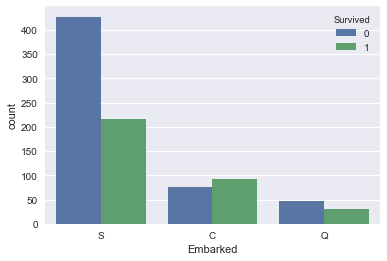

In [11]:
# Embarked
sns.countplot(x='Embarked',hue='Survived',data = train)
embark_p = pd.get_dummies(train.Embarked)   #columns=['embarked_c','embarked_q','embarked_s']

train = train.join(embark_p)
train.drop(['Embarked'],axis = 1,inplace=True)


In [13]:
train.drop(['Cabin'],axis = 1, inplace=True)

In [15]:
pcl = pd.get_dummies(train.Pclass)

In [16]:
train = train.join(pcl)

In [17]:
train.drop(['Pclass'],axis=1,inplace=True)

In [18]:
train.Age.fillna(train.Age.median(),inplace=True)

In [19]:
mean = train.Age.mean()
age_range =train.Age.max()-train.Age.min()
age_range

79.579999999999998

In [21]:
train.drop(['Age'],inplace=True,axis=1)

In [22]:
train = train.join(scaling_age)

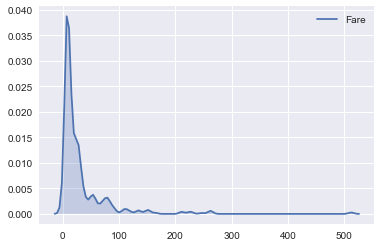

In [23]:
sns.kdeplot(train.Fare,shade = True)

In [24]:
train.Fare = (train.Fare-train.Fare.min())/(train.Fare.max()-train.Fare.min())

In [25]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,C,Q,S,1,2,3,Age
0,0,1,1,0,0.014151,0,0,1,0,0,1,0.271174
1,1,0,1,0,0.139136,1,0,0,1,0,0,0.472229
2,1,0,0,0,0.015469,0,0,1,0,0,1,0.321438
3,1,0,1,0,0.103644,0,0,1,1,0,0,0.434531
4,0,1,0,0,0.015713,0,0,1,0,0,1,0.434531


In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test_embarked = pd.get_dummies(test.Embarked)

In [28]:
test = test.join(test_embarked)

In [29]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace=True)

In [30]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,3,male,34.5,0,0,7.8292,Q,0,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,0,1,0
3,3,male,27.0,0,0,8.6625,S,0,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [31]:
test.drop(['Embarked'],axis=1,inplace=1)

In [32]:
def scaling(x):
    min_ = x.min()
    max_ = x.max()
    range_ = max_-min_
    y = (x-min_)/(range_)
    return y

In [33]:
test.Age = scaling(test.Age)

In [34]:
test.Fare = scaling(test.Fare)

In [35]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,male,0.452723,0,0,0.015282,0,1,0
1,3,female,0.617566,1,0,0.013663,0,0,1
2,2,male,0.815377,0,0,0.018909,0,1,0
3,3,male,0.353818,0,0,0.016908,0,0,1
4,3,female,0.287881,1,1,0.023984,0,0,1


In [36]:
test.Sex[test.Sex=='male']=1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
test.Sex[test.Sex=='female']=0

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,0.452723,0,0,0.015282,0,1,0
1,3,0,0.617566,1,0,0.013663,0,0,1
2,2,1,0.815377,0,0,0.018909,0,1,0
3,3,1,0.353818,0,0,0.016908,0,0,1
4,3,0,0.287881,1,1,0.023984,0,0,1


In [39]:
train.head()

,Survived,Sex,SibSp,Parch,Fare,C,Q,S,1,2,3,Age
0,0,1,1,0,0.014151,0,0,1,0,0,1,0.271174
1,1,0,1,0,0.139136,1,0,0,1,0,0,0.472229
2,1,0,0,0,0.015469,0,0,1,0,0,1,0.321438
3,1,0,1,0,0.103644,0,0,1,1,0,0,0.434531
4,0,1,0,0,0.015713,0,0,1,0,0,1,0.434531


In [40]:
test = test.join(pd.get_dummies(test.Pclass))

In [41]:
test.drop(['Pclass'],axis=1,inplace=True)

In [42]:
test.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,1,0.452723,0,0,0.015282,0,1,0,0,0,1
1,0,0.617566,1,0,0.013663,0,0,1,0,0,1
2,1,0.815377,0,0,0.018909,0,1,0,0,1,0
3,1,0.353818,0,0,0.016908,0,0,1,0,0,1
4,0,0.287881,1,1,0.023984,0,0,1,0,0,1


In [43]:
c1 = train.copy()

In [44]:
X_train = train.drop(['Survived'],axis = 1)

In [45]:
y_train = train['Survived']

In [46]:
X_test = test

In [47]:
X_test.info()
print '-----'
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Sex      418 non-null object
Age      332 non-null float64
SibSp    418 non-null int64
Parch    418 non-null int64
Fare     417 non-null float64
C        418 non-null uint8
Q        418 non-null uint8
S        418 non-null uint8
1        418 non-null uint8
2        418 non-null uint8
3        418 non-null uint8
dtypes: float64(2), int64(2), object(1), uint8(6)
memory usage: 18.8+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Sex      891 non-null object
SibSp    891 non-null int64
Parch    891 non-null int64
Fare     891 non-null float64
C        891 non-null uint8
Q        891 non-null uint8
S        891 non-null uint8
1        891 non-null uint8
2        891 non-null uint8
3        891 non-null uint8
Age      891 non-null float64
dtypes: float64(2), int64(2), object(1), uint8(6)
memory usage: 40.1+ KB


In [48]:
cols = list(X_train)

In [49]:
X_train.head()

,Sex,SibSp,Parch,Fare,C,Q,S,1,2,3,Age
0,1,1,0,0.014151,0,0,1,0,0,1,0.271174
1,0,1,0,0.139136,1,0,0,1,0,0,0.472229
2,0,0,0,0.015469,0,0,1,0,0,1,0.321438
3,0,1,0,0.103644,0,0,1,1,0,0,0.434531
4,1,0,0,0.015713,0,0,1,0,0,1,0.434531


In [50]:
X_test.head()

,Sex,Age,SibSp,Parch,Fare,C,Q,S,1,2,3
0,1,0.452723,0,0,0.015282,0,1,0,0,0,1
1,0,0.617566,1,0,0.013663,0,0,1,0,0,1
2,1,0.815377,0,0,0.018909,0,1,0,0,1,0
3,1,0.353818,0,0,0.016908,0,0,1,0,0,1
4,0,0.287881,1,1,0.023984,0,0,1,0,0,1


In [51]:
cols

['Sex', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 1L, 2L, 3L, 'Age']

In [52]:
X_test = X_test.ix[:,cols]

In [53]:
X_test.info()
print '-------------'
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Sex      418 non-null object
SibSp    418 non-null int64
Parch    418 non-null int64
Fare     417 non-null float64
C        418 non-null uint8
Q        418 non-null uint8
S        418 non-null uint8
1        418 non-null uint8
2        418 non-null uint8
3        418 non-null uint8
Age      332 non-null float64
dtypes: float64(2), int64(2), object(1), uint8(6)
memory usage: 18.8+ KB
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Sex      891 non-null object
SibSp    891 non-null int64
Parch    891 non-null int64
Fare     891 non-null float64
C        891 non-null uint8
Q        891 non-null uint8
S        891 non-null uint8
1        891 non-null uint8
2        891 non-null uint8
3        891 non-null uint8
Age      891 non-null float64
dtypes: float64(2), int64(2), object(1), uint8(6)
memory usage: 40.1+ KB


In [54]:
LR = LogisticRegression()

In [55]:
from sklearn.cross_validation import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.4)

In [59]:
x_test.shape

(357, 11)

In [65]:
lr1 = LogisticRegression()

In [66]:
lr1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
y_test_pred = lr1.predict(x_test)

In [68]:
from sklearn import metrics

In [69]:
print metrics.accuracy_score(y_test,y_test_pred)

0.798319327731


In [55]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
X_test.Age = X_test.Age.fillna(X_test.Age.median())

In [57]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [115]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
Sex      418 non-null object
SibSp    418 non-null int64
Parch    418 non-null int64
Fare     418 non-null float64
C        418 non-null uint8
Q        418 non-null uint8
S        418 non-null uint8
1        418 non-null uint8
2        418 non-null uint8
3        418 non-null uint8
Age      418 non-null float64
dtypes: float64(2), int64(2), object(1), uint8(6)
memory usage: 18.8+ KB


In [114]:
X_test.Fare = X_test.Fare.fillna(X_test.Fare.median())

In [84]:
lr_pred = LR.predict(X_test)

In [61]:
LR.score(X_train,y_train)

0.80471380471380471

In [91]:
LR.coef_[0]

array([-2.55559329, -0.26521847, -0.05294074,  0.65823371,  0.57713318,
        0.46004675,  0.11700321,  1.41070343,  0.59838127, -0.54317718,
       -2.02928191])

In [62]:
random_forest = RandomForestClassifier(n_estimators=100)

In [63]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
y_pred = random_forest.predict(X_test)

In [99]:
random_forest.score(X_train,y_train)

0.97979797979797978

In [119]:
df_test = pd.read_csv(r'E:\KAGGLE\test.csv')

In [67]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
submission = pd.DataFrame({
    'PassengerId':df_test.PassengerId,
    'Survived':y_pred    
})

In [69]:
submission.to_csv('titanic.csv',index=False)

In [70]:
pwd

u'C:\\Users\\Administrator.USER-20170212ZW\\my_py_ex'

In [75]:
train.columns.delete(0)

Index([u'Sex', u'SibSp', u'Parch', u'Fare', u'C', u'Q', u'S', 1, 2, 3, u'Age'], dtype='object')

In [78]:
coeff = pd.DataFrame(train.columns.delete(0))

In [80]:
coeff.columns = ['features']

In [92]:
LR.coef_

array([[-2.55559329, -0.26521847, -0.05294074,  0.65823371,  0.57713318,
         0.46004675,  0.11700321,  1.41070343,  0.59838127, -0.54317718,
        -2.02928191]])

In [93]:
coeff['Coefficient estimate'] = LR.coef_[0]

In [94]:
coeff

,features,Coefficient estimate
0,Sex,-2.555593
1,SibSp,-0.265218
2,Parch,-0.052941
3,Fare,0.658234
4,C,0.577133
5,Q,0.460047
6,S,0.117003
7,1,1.410703
8,2,0.598381
9,3,-0.543177


In [98]:
type(random_forest.class_weight)

NoneType

In [106]:
X_train.shape

(891, 11)

In [104]:
y_train = train.Survived

In [105]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
x_train_,x_test_,y_train_,y_test_ = train_test_split(X_train,y_train,test_size = 0.25)

In [81]:
random_forest = RandomForestClassifier(n_estimators=10)

In [82]:
random_forest.fit(x_train_,y_train_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [83]:
y_pred = random_forest.predict(x_test_)

In [84]:
print metrics.accuracy_score(y_pred,y_test_)

0.789237668161


In [93]:
for i in range(10,31):
    random_forest_ = RandomForestClassifier(n_estimators= i)
    random_forest_.fit(x_train_,y_train_)
    y_pred1 = random_forest_.predict(x_test_)
    score[i] = metrics.accuracy_score(y_pred1,y_test_)
    
    
        

In [95]:
i = 100
random_forest_ = RandomForestClassifier(n_estimators= i)
random_forest_.fit(x_train_,y_train_)
y_pred1 = random_forest_.predict(x_test_)
score[i] = metrics.accuracy_score(y_pred1,y_test_)
    

In [96]:
score

{10: 0.77130044843049328,
 11: 0.79372197309417036,
 12: 0.7847533632286996,
 13: 0.7623318385650224,
 14: 0.78923766816143492,
 15: 0.78923766816143492,
 16: 0.7982062780269058,
 17: 0.80717488789237668,
 18: 0.78923766816143492,
 19: 0.79372197309417036,
 20: 0.77130044843049328,
 21: 0.78923766816143492,
 22: 0.78026905829596416,
 23: 0.7982062780269058,
 24: 0.77578475336322872,
 25: 0.78026905829596416,
 26: 0.79372197309417036,
 27: 0.78026905829596416,
 28: 0.7982062780269058,
 29: 0.80269058295964124,
 30: 0.7847533632286996,
 100: 0.78026905829596416}

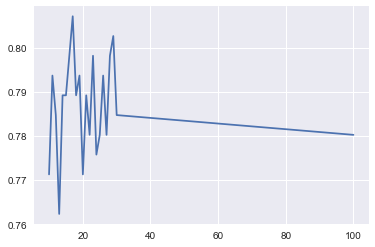

In [101]:
plt.plot(score.keys(),score.values(),)

In [102]:
random_forest = RandomForestClassifier(n_estimators=17)

In [107]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=17, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [116]:
y_pred = random_forest.predict(X_test)

In [117]:
y1 = random_forest.predict(X_train)

In [118]:
print metrics.accuracy_score(y1,y_train)

0.971941638608


In [121]:
df_test.PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, dtype: int64

In [122]:
submision = pd.DataFrame(df_test.PassengerId)

In [124]:
submision['Survived'] = y_pred

In [127]:
submision.to_csv('E:\\titanic.csv',index=False)